***CREDIT SCORING MODEL*** 📈

Import libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Load and Inspect the Dataset

In [11]:
# Load the dataset
train_data = pd.read_csv('Credit_Scoring.csv')

# Display the first few rows and summary information to understand the data and identify the target variable
print(train_data.head())
print(train_data.describe())
print(train_data.info())

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

Data Preprocessing

In [12]:
# Assuming 'Credit_Score' is the target and needs to be binarized
target_variable_name = 'Credit_Score'  # Replace with the actual name of your target column
train_data[target_variable_name] = train_data[target_variable_name].apply(lambda x: 1 if x == 'Good' else 0)

# Prepare the feature matrix and target vector
X = train_data.drop(target_variable_name, axis=1)
y = train_data[target_variable_name]

# Identify categorical and numerical columns for preprocessing
categorical_cols = [col for col in X.columns if X[col].dtype == "object"]
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]


Further Preprocessing and Modeling Pipeline

In [13]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Preprocessing for categorical data with conversion to strings
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('to_string', FunctionTransformer(lambda x: x.astype(str))),  # Convert to string
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Cast categorical columns to strings to avoid issues with mixed data types
for col in categorical_cols:
    X[col] = X[col].astype(str)

# Updated preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Fill missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode
])

# Define the model
model = RandomForestClassifier(random_state=42)

# Create a pipeline that combines the preprocessor with the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

Split the Training Data for Validation

In [14]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In [8]:
# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Rate',
                                                   'Delay_from_due_date',
                                                   'Num_Credit_Inquiries',
                                                   'Credit_Utilization_Ratio',
                                                   'Total_EMI_per_month']),
                                                 ('cat',
                                                  Pipeline(steps=[('imput...
                                                  ['ID', 'Customer_ID', 'Month',
                                                   'Name', 'Age', 'SSN',
                                                   'Occupation',
                                                   'Annual_Income',
                                                   'Num_of_Loan',
                                                   'Type_of_Loan',
                                                   'Num_of_Delayed_Payment',
                                                   'Changed_Credit_Limit',
                                                   'Credit_Mix',
                                                   'Outstanding_Debt',
                                                   'Credit_History_Age',
                                                   'Payment_of_Min_Amount',
                                                   'Amount_invested_monthly',
                                                   'Payment_Behaviour',
                                                   'Monthly_Balance'])])),
                ('model', RandomForestClassifier(random_state=42))])

Model's Performance Evaluation

Accuracy: 0.8991995256448265
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2778
           1       0.82      0.54      0.66       595

    accuracy                           0.90      3373
   macro avg       0.87      0.76      0.80      3373
weighted avg       0.89      0.90      0.89      3373



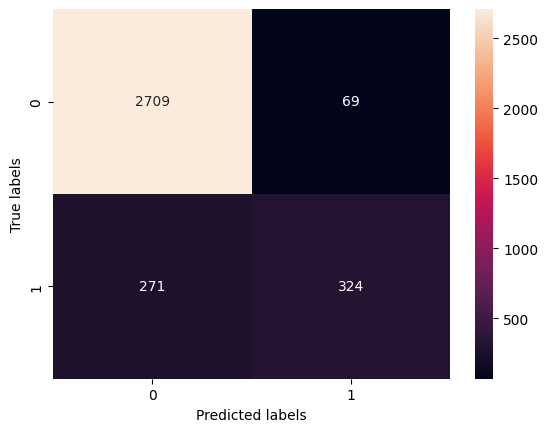

In [9]:
# Predict and evaluate the model
y_pred = pipeline.predict(X_valid)

# Display accuracy and classification report
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_valid, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()